# An introduction to seaborn
http://seaborn.pydata.org/introduction.html

https://blog.csdn.net/suzyu12345/article/details/69029106 

Seaborn is a library for making __statistical graphics__ in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。

seaborns是针对统计绘图的!!!

## 几个概念
如果使用过R语言的ggplot2绘图包，对分组分面，统计绘图等概念应该很熟悉，这里也介绍下。

* 分组绘图  
比如说需要在一张图上绘制两条曲线，分别是南方和北方的气温变化，分别用不同的颜色加以区分。在seaborn中用__hue参数__控制分组绘图。

* 分面绘图  
其实就是在一张纸上划分不同的区域，比如2*2的子区域，在不同的子区域上绘制不同的图形，在matplotlib中就是 add_subplot(2,2,1)，在seaborn中用__col,row参数__控制，如果辅助col_wrap参数会更好些。后来发现，col可以控制columns的子图，那么row可以控制rows的子图排列。   
如果需要分面绘图，应该使用seaborn的FacetGrid对象，seaborn的一般的绘图函数是没有分面这个参数的。

* 统计函数  
分组绘图的时候，会对分组变量先要用统计函数，然后绘图，比如先计算变量的均值，然后绘制该均值的直方图。统计绘图是 __estimator参数__，很多情况下默认是numpy.mean。在ggplot2中就大量使用了这种方法。如果不适用统计绘图，就需要先用pandas进行groupby分组汇总，然后用seaborn绘图，多此一举了。

## 主题

seaborn的默认主题就是最好看的，

In [86]:
sns.set()  # 恢复默认主题

还有其他几个主题，包括：

In [87]:
sns.set_style("whitegrid")  # 白色网格背景
sns.set_style("darkgrid")   # 灰色网格背景
sns.set_style("dark")       # 灰色背景
sns.set_style("white")      # 白色背景
sns.set_style("ticks")      # 四周加边框和刻度

## 颜色

颜色一般来说用默认的颜色就好了，而且也比较好看，如果非要设置颜色，可以通过sns.set_palette("husl")设置。 
常用的其他颜色模式还有：

In [ ]:
sns.set_palette("muted")    # 常用
sns.set_palette("RdBu")
sns.set_palette("Blues_d")
sns.set_palette("Set1")
sns.set_palette("RdBu")

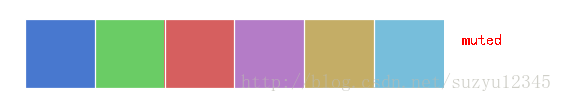

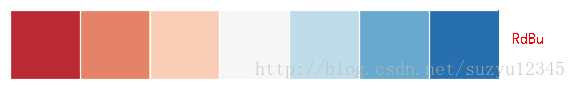

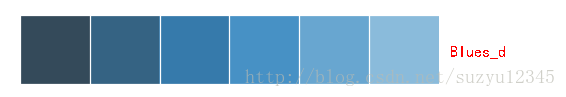

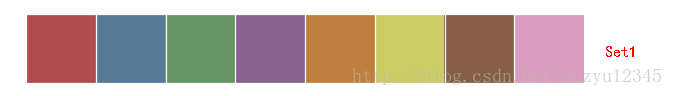

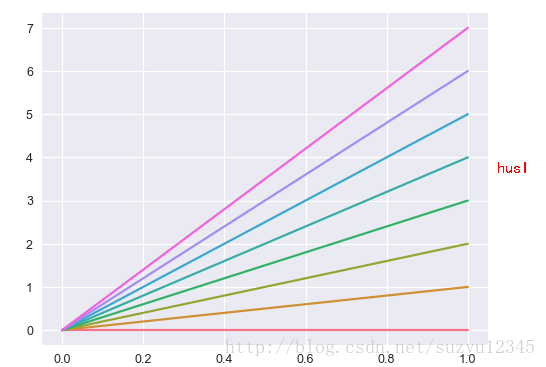

# tutorial
__http://seaborn.pydata.org/tutorial.html__

replot展示数据的维度主要有以下几个参数：  
* x,y: 点的位置
* hue: 颜色
* style: 线型
* size: 点的大小
* col, row: 绘制子图展示

## Visualizing statistical relationships

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='STFangsong')  # 解决Seaborn中文显示问题
# sns.set(style="darkgrid")

In [2]:
sns.distplot()

AttributeError: module 'seaborn' has no attribute 'set_displot'

In [5]:
# 小费
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Relating variables with scatter plots

#### 2D数据

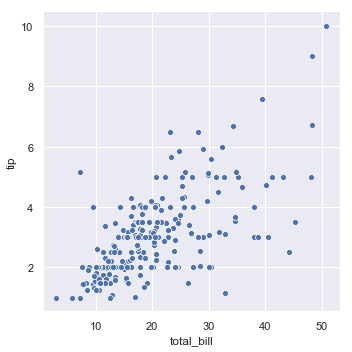

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips);

#### 3D数据

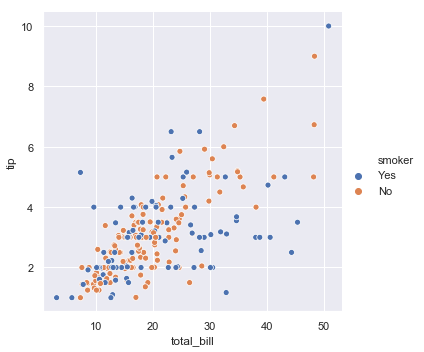

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

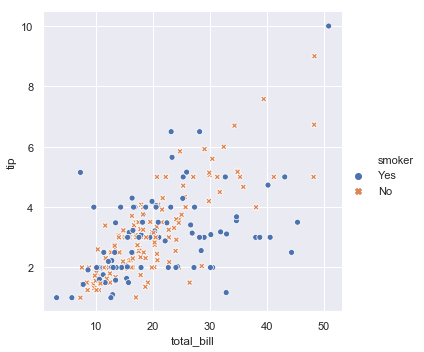

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

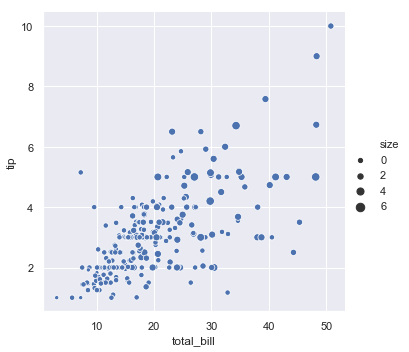

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

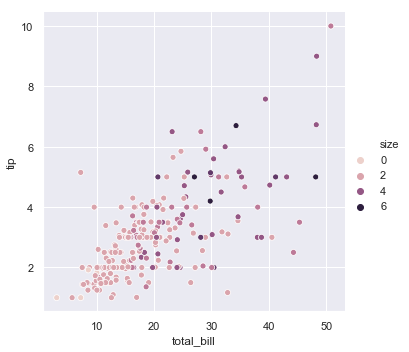

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

#### 4D数据
It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

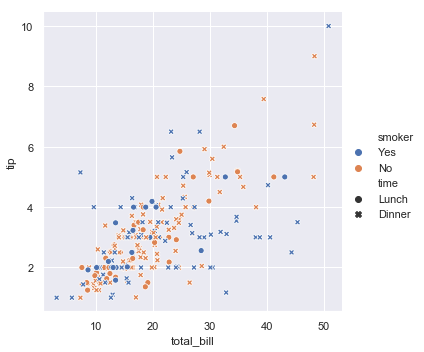

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

### Emphasizing continuity with line plots

In [11]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,0.971252
1,1,2.725138
2,2,3.372339
3,3,3.213011
4,4,4.442229


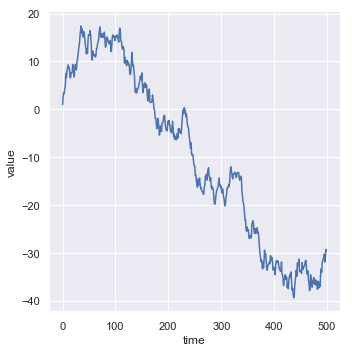

In [12]:
g = sns.relplot(x="time", y="value", kind="line", data=df)

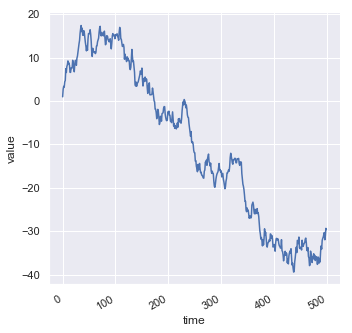

In [13]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [14]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [17]:
fmri.groupby('timepoint')['signal'].mean()

timepoint
0    -0.016662
1    -0.025002
2    -0.012873
3     0.034446
4     0.098194
5     0.137725
6     0.127515
7     0.075660
8     0.013420
9    -0.032041
10   -0.053685
11   -0.058194
12   -0.052526
13   -0.043532
14   -0.033660
15   -0.025880
16   -0.022414
17   -0.021368
18   -0.021867
Name: signal, dtype: float64

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


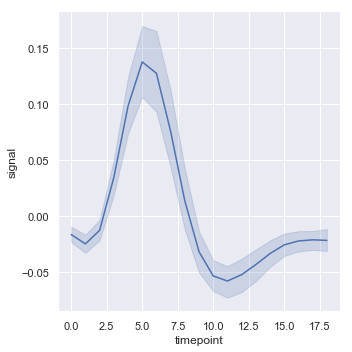

In [15]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

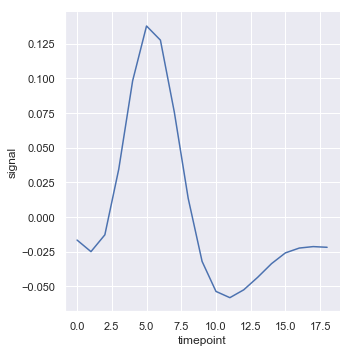

In [18]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

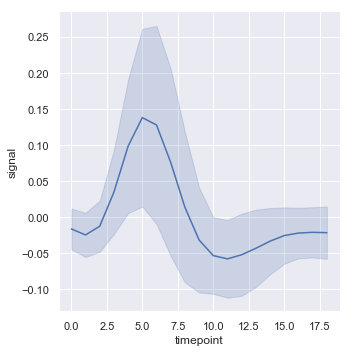

In [19]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

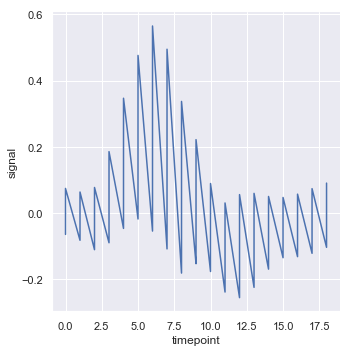

In [20]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

#### Plotting subsets of data with semantic mappings

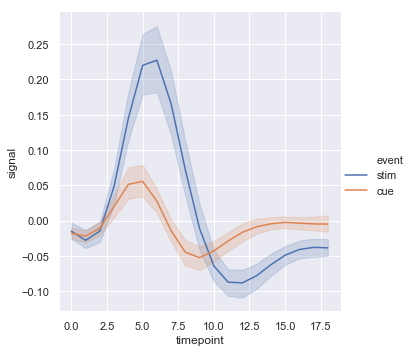

In [21]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

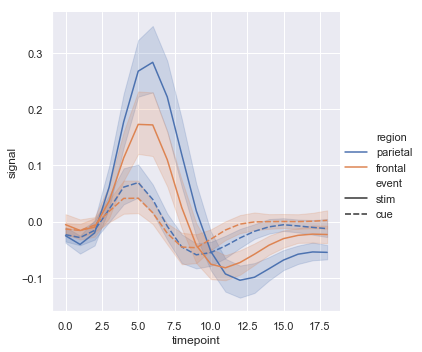

In [22]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

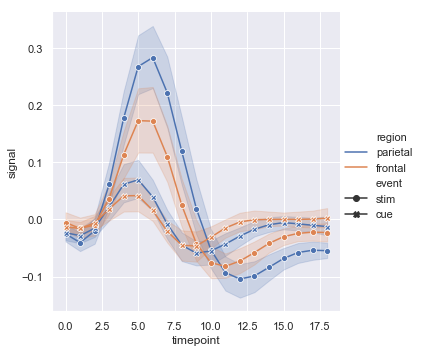

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

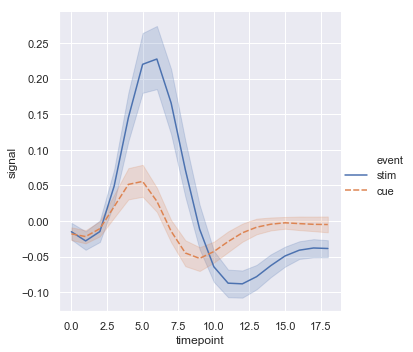

In [24]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

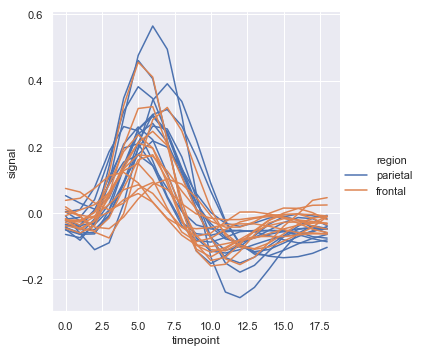

In [25]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

### Showing multiple relationships with facets

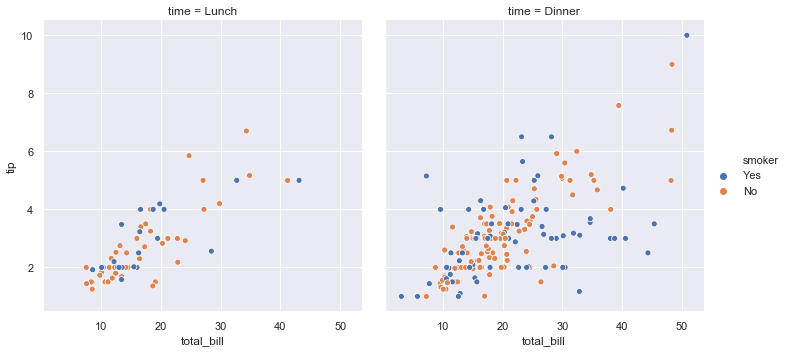

In [26]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

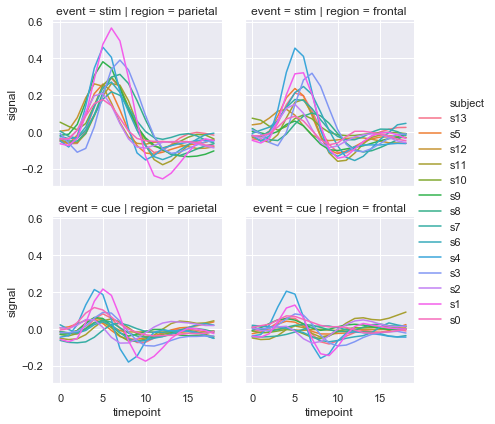

In [27]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

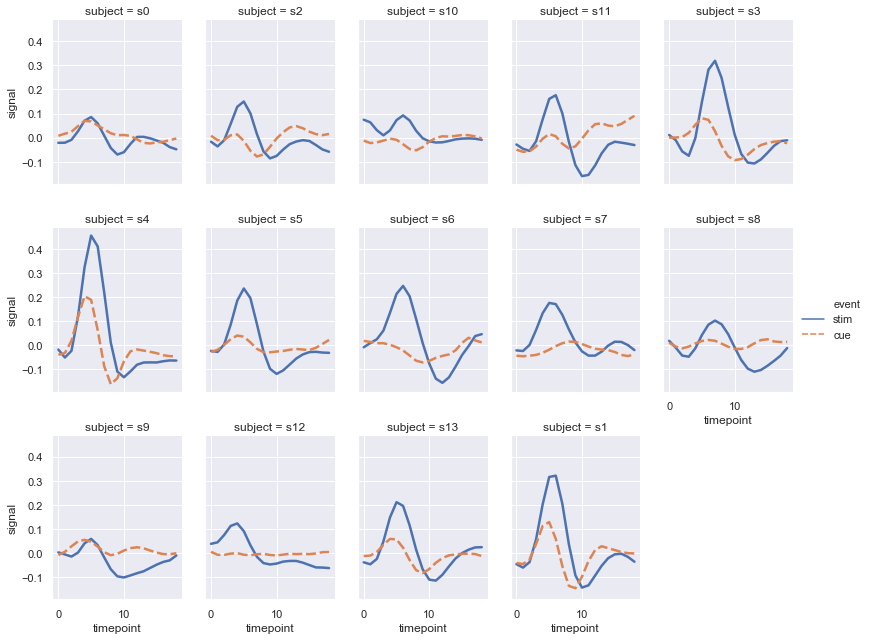

In [28]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Plotting with categorical data

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### Categorical scatterplots 分类散点图

In [31]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


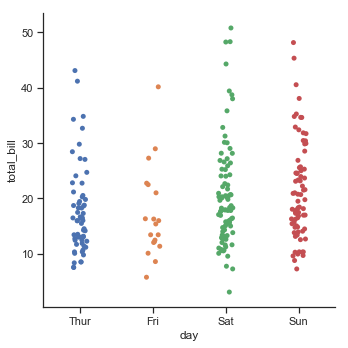

In [32]:
sns.catplot(x="day", y="total_bill", data=tips);

The jitter(抖动) parameter controls the magnitude of jitter or disables it altogether:

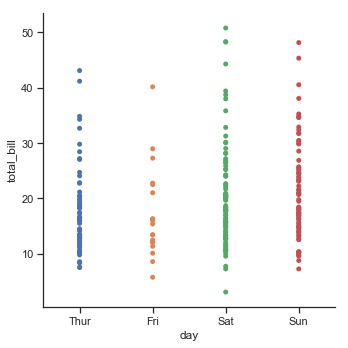

In [33]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping.

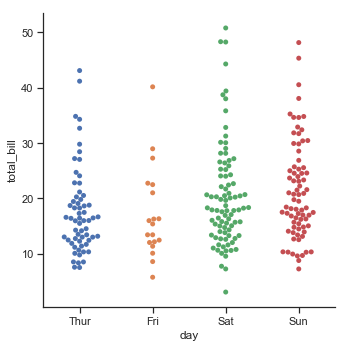

In [34]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

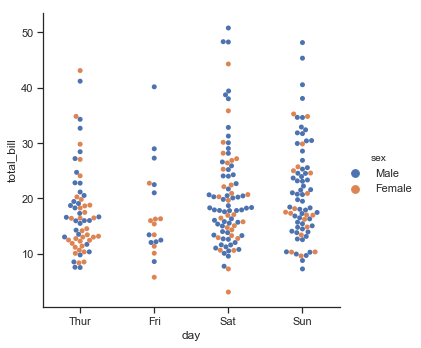

In [35]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

#### 分类变量的顺序  
与数值数据不同，如何沿着轴顺序排列分类变量并不总是显而易见的。 通常，seaborn分类绘图函数试图从数据中推断出类别的顺序。 如果您的数据具有pandas Categorical数据类型，则可以在此处设置类别的默认顺序。 如果传递给分类轴的变量看起来是数字，则将对级别进行排序。 但是数据仍然被视为分类并在分类轴上的序数位置（特别是0,1，......）处理，即使使用数字来标记它们：

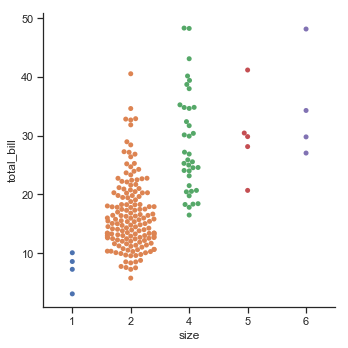

In [36]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

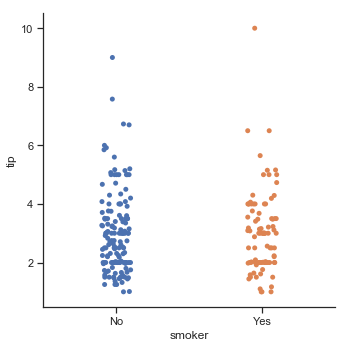

In [37]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

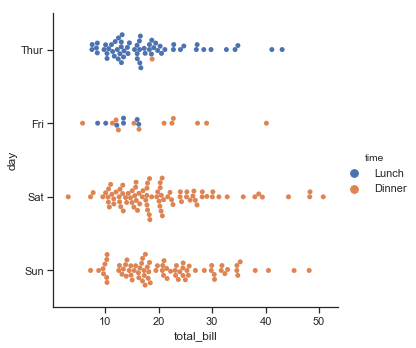

In [38]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

### Distributions of observations within categories

#### Boxplots 箱线图

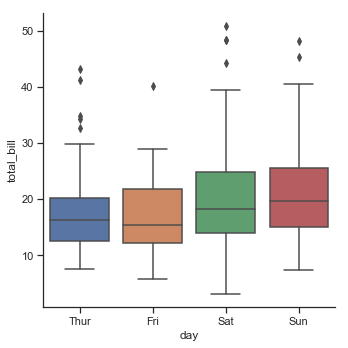

In [39]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

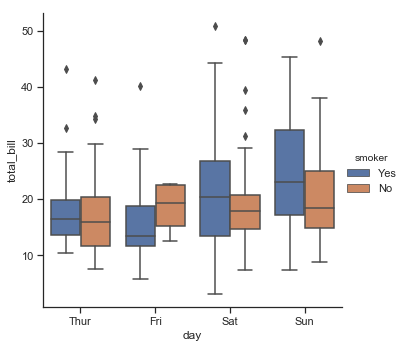

In [40]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:

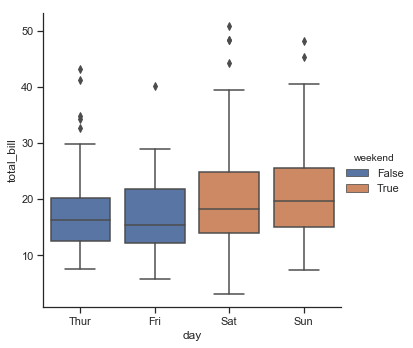

In [41]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

#### boxen 改进的箱线图
A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

In [42]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
diamonds.shape

(53940, 10)

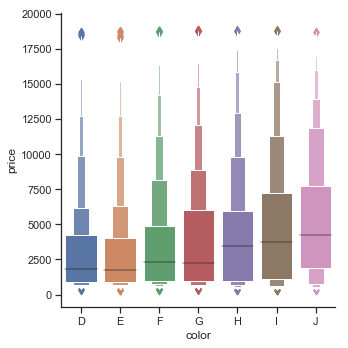

In [44]:
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

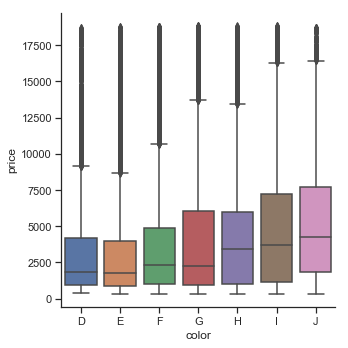

In [45]:
sns.catplot(x="color", y="price", kind="box",
            data=diamonds.sort_values("color"));

#### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


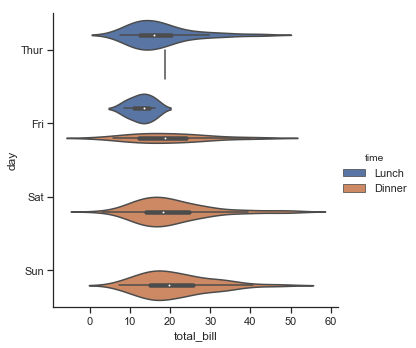

In [46]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

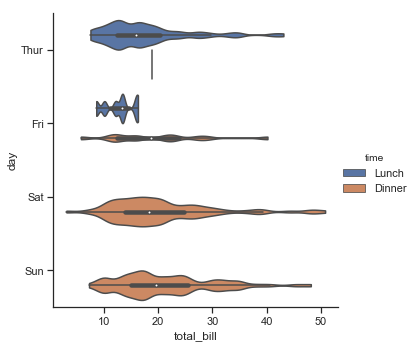

In [47]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

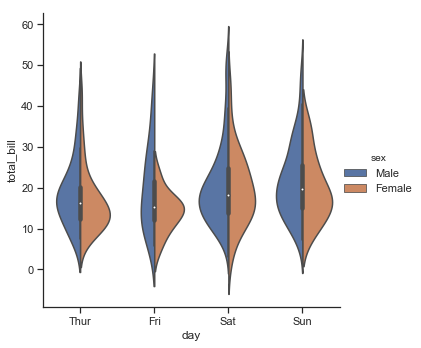

In [48]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

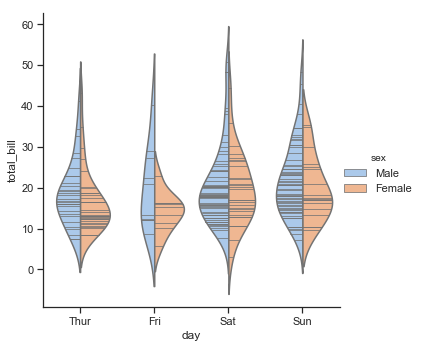

In [49]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

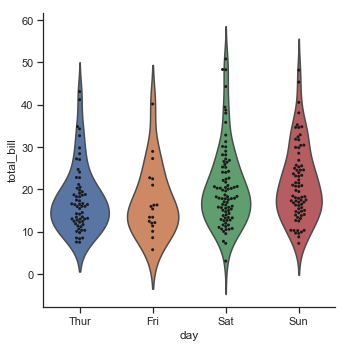

In [50]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

### Statistical estimation within categories

#### Bar plots 条形图

In [51]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


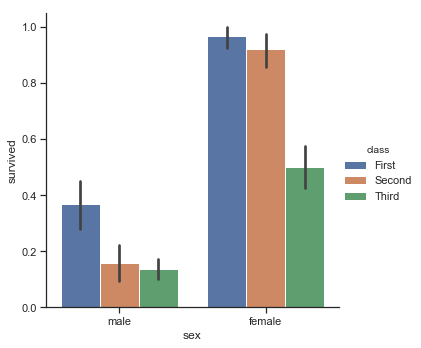

In [52]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

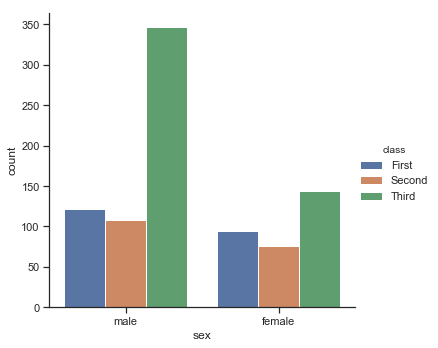

In [55]:
sns.catplot(x="sex", hue="class", kind="count", data=titanic);

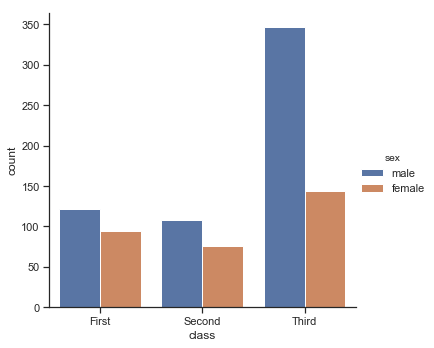

In [56]:
sns.catplot(x="class", hue="sex", kind="count", data=titanic);

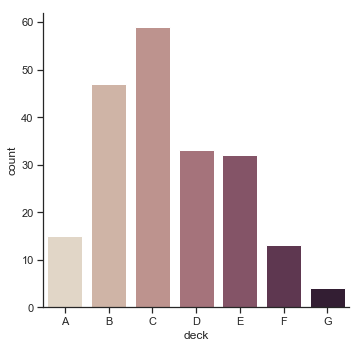

In [53]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

#### Point plots

#### Plotting “wide-form” data
While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

In [57]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


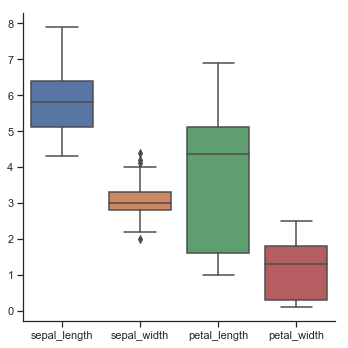

In [58]:
sns.catplot(data=iris, kind='box')

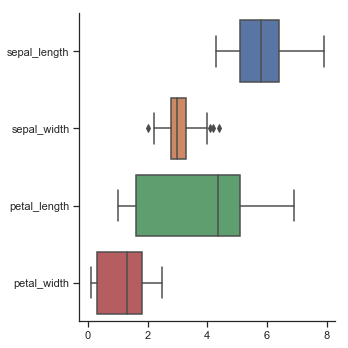

In [59]:
sns.catplot(data=iris, kind='box', orient='h')

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


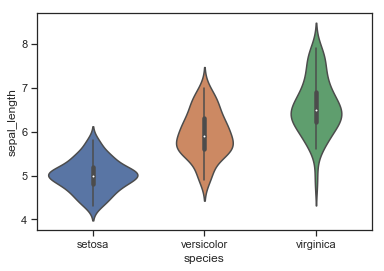

In [60]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

## Visualizing the distribution of a dataset

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

### Plotting univariate distributions 绘制单一变量分布

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

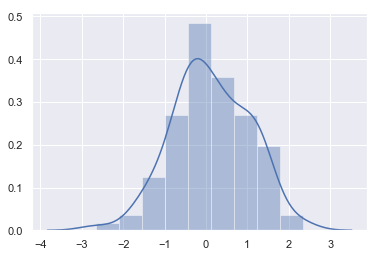

In [62]:
x = np.random.normal(size=100)
sns.distplot(x);

#### Histograms 直方图

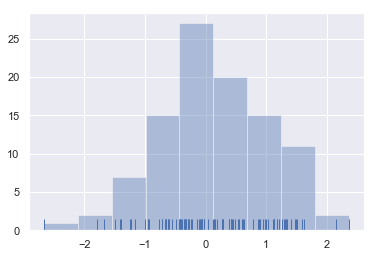

In [63]:
sns.distplot(x, kde=False, rug=True);

#### 调节bins的数量

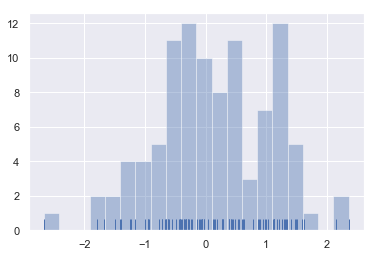

In [64]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### KDE

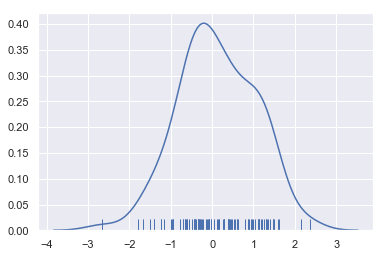

In [65]:
sns.distplot(x, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

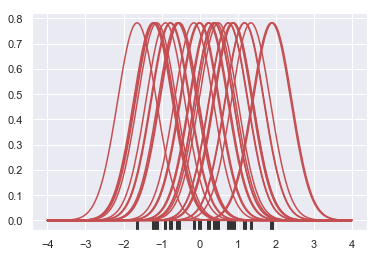

In [66]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

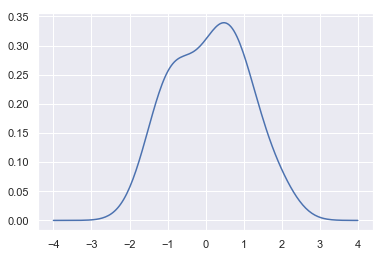

In [67]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

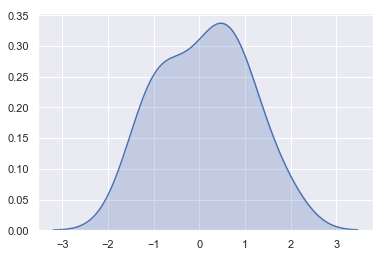

In [68]:
sns.kdeplot(x, shade=True);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:



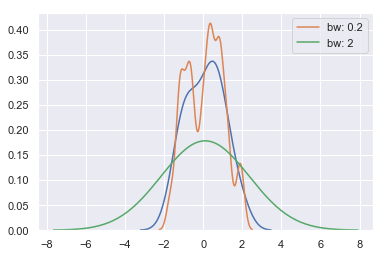

In [69]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

#### Fitting parametric distributions 拟合参数分布

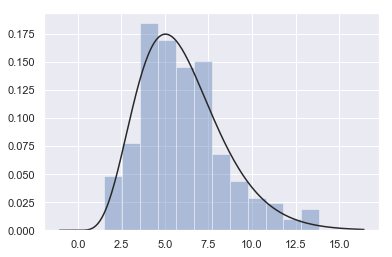

In [70]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


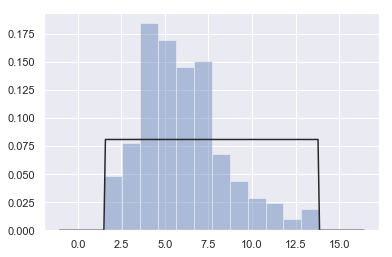

In [71]:
sns.distplot(x, kde=False, fit=stats.uniform);

### Plotting bivariate distributions 绘制二元分布

In [72]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,0.645981,1.634463
1,-0.184481,1.053162
2,-0.548321,1.411148
3,0.349108,0.384010
4,0.469428,1.653092


In [73]:
data.shape

(200, 2)

#### Scatterplots
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


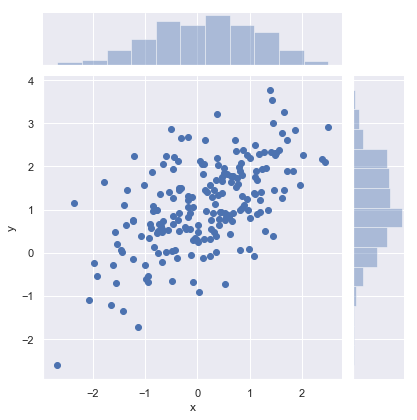

In [74]:
sns.jointplot(x="x", y="y", data=df);

#### Hexbin plots
The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background:

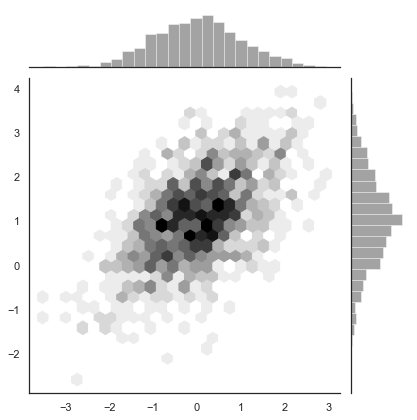

In [75]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

#### Kernel density estimation
It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

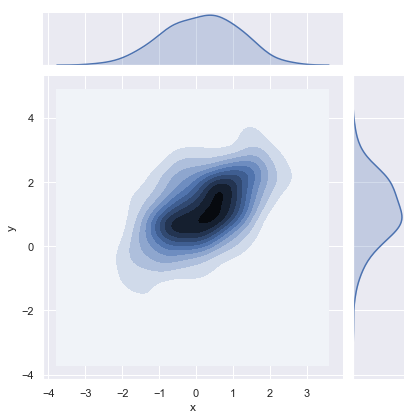

In [76]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

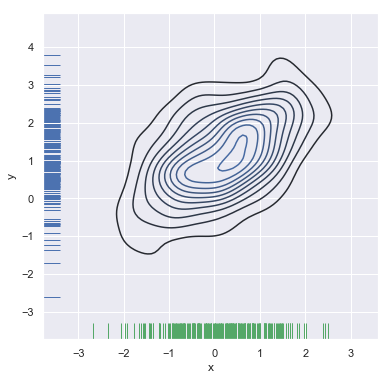

In [78]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

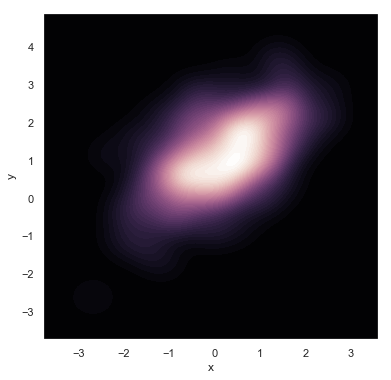

In [79]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

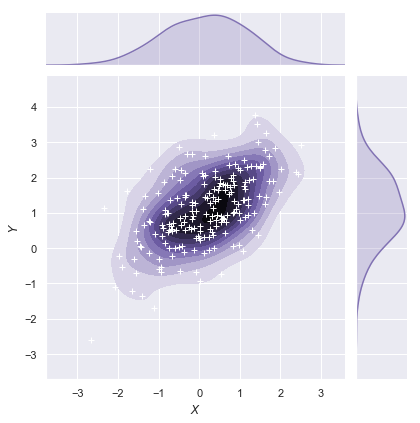

In [80]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

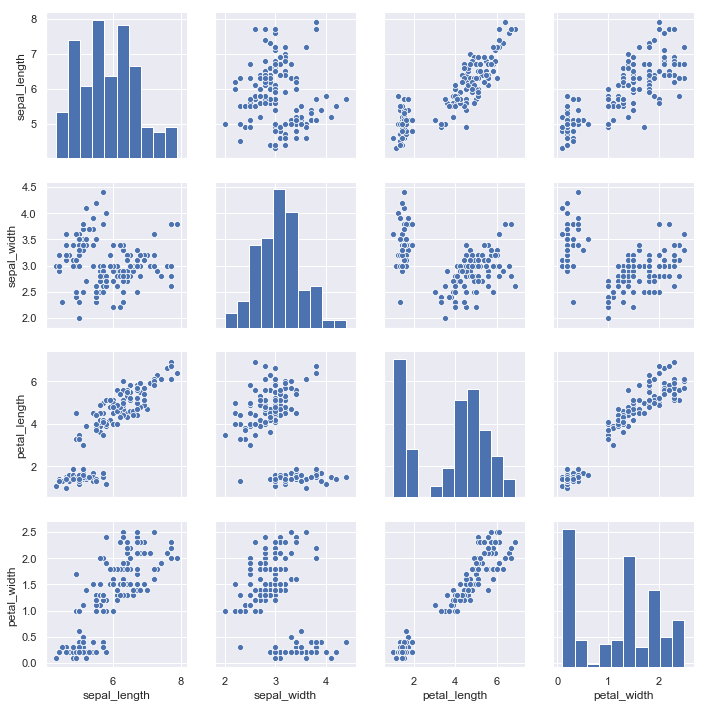

In [81]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

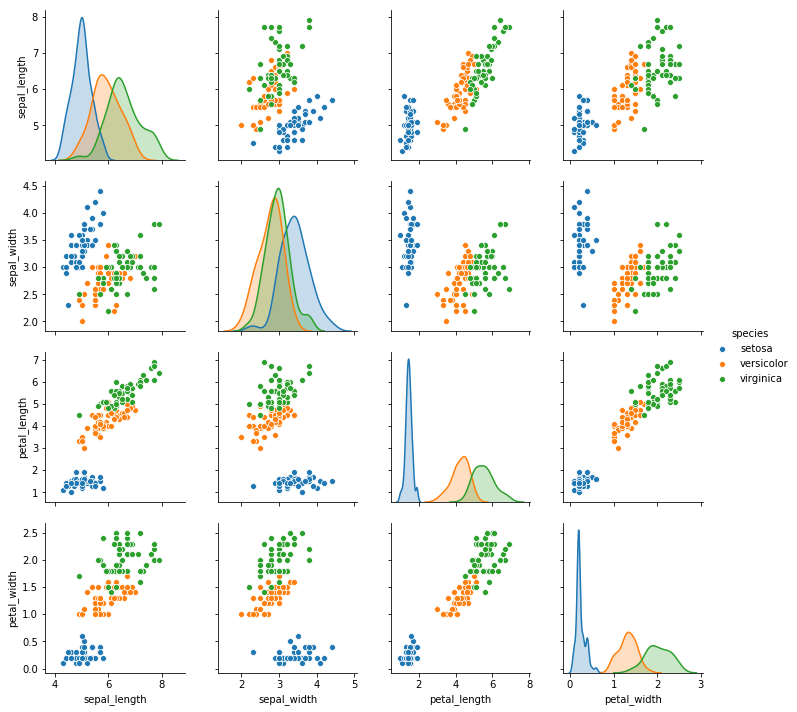

In [6]:
g = sb.pairplot(iris, hue="species")

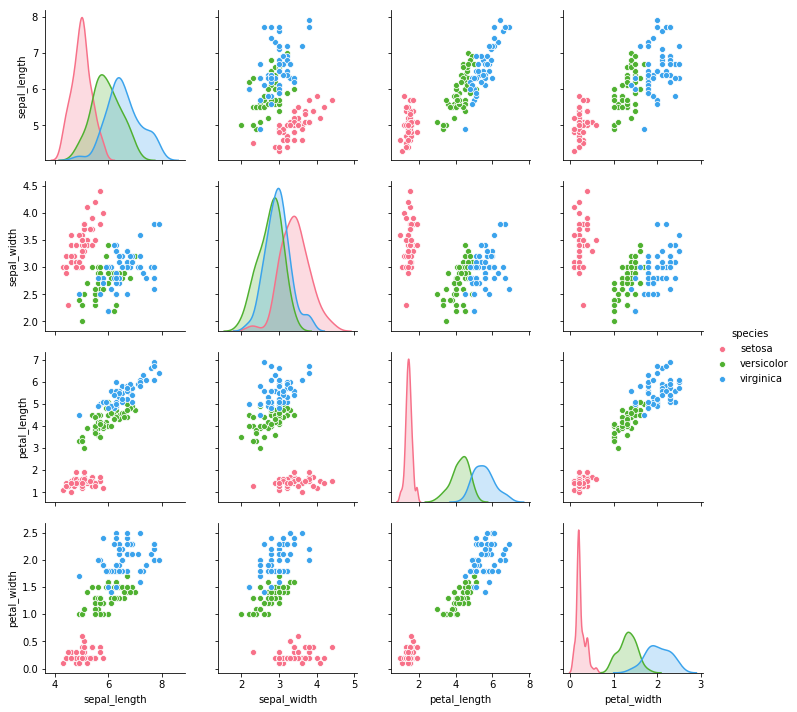

In [7]:
g = sb.pairplot(iris, hue="species", palette="husl")

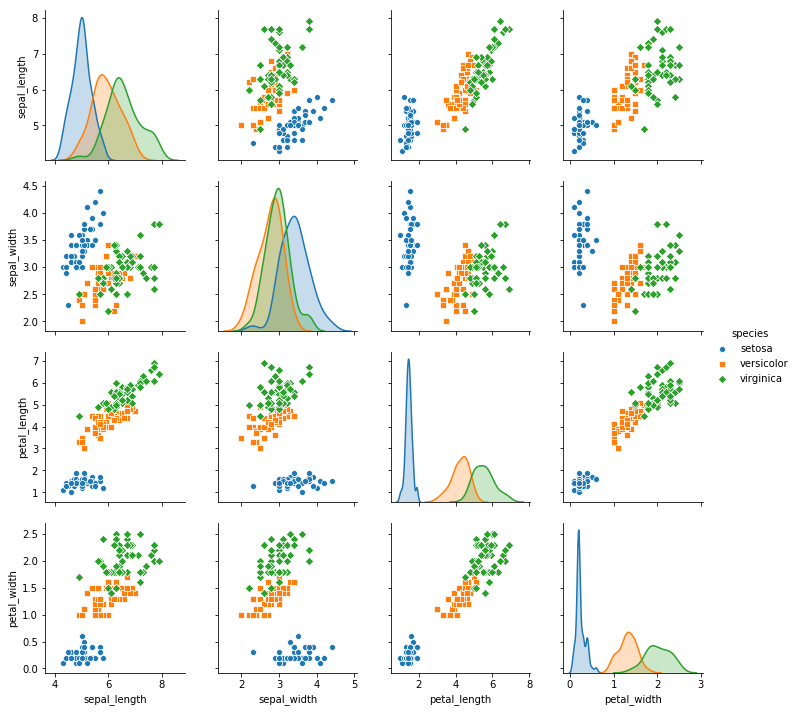

In [9]:
g = sb.pairplot(iris, hue="species", markers=["o", "s", "D"])

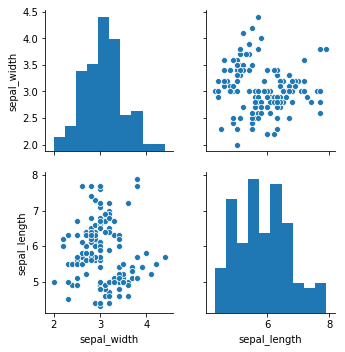

In [10]:
g = sb.pairplot(iris, vars=["sepal_width", "sepal_length"])

### Draw larger plots:

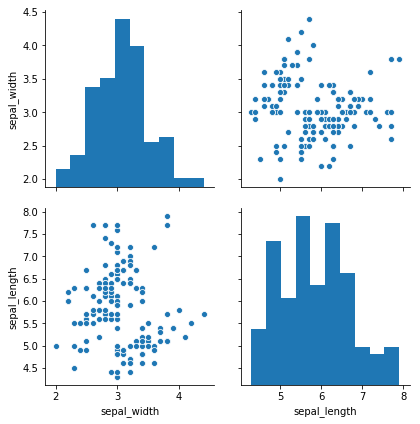

In [11]:
g = sb.pairplot(iris, height=3,
                         vars=["sepal_width", "sepal_length"])

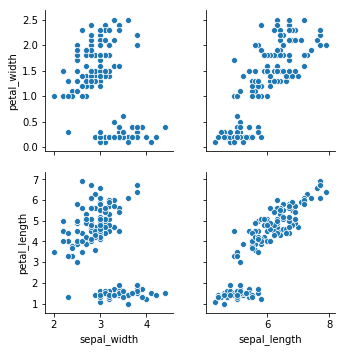

In [12]:
g = sb.pairplot(iris,
                          x_vars=["sepal_width", "sepal_length"],
                      y_vars=["petal_width", "petal_length"])

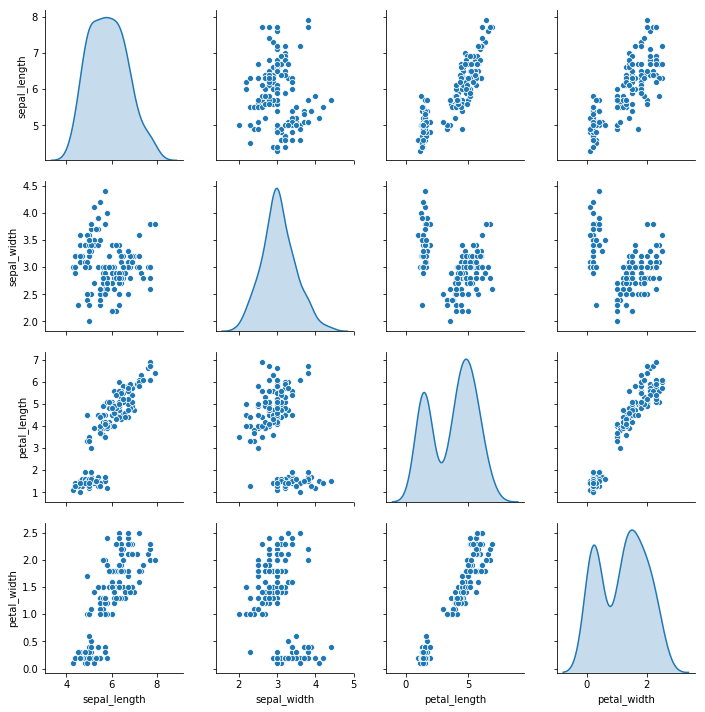

In [13]:
g = sb.pairplot(iris, diag_kind="kde")

### Fit linear regression models to the scatter plots:

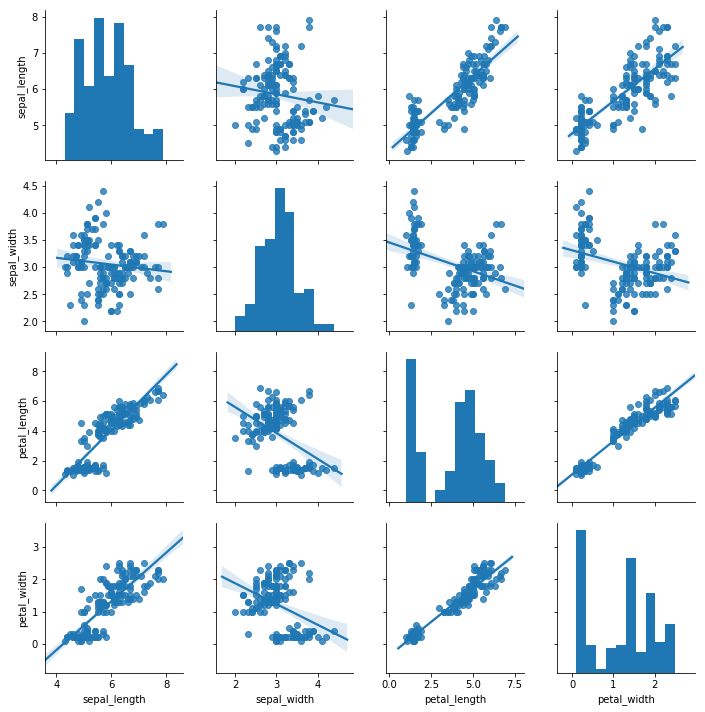

In [14]:
g = sb.pairplot(iris, kind="reg")

### Pass keyword arguments down to the underlying functions (it may be easier to use :class:`PairGrid` directly):

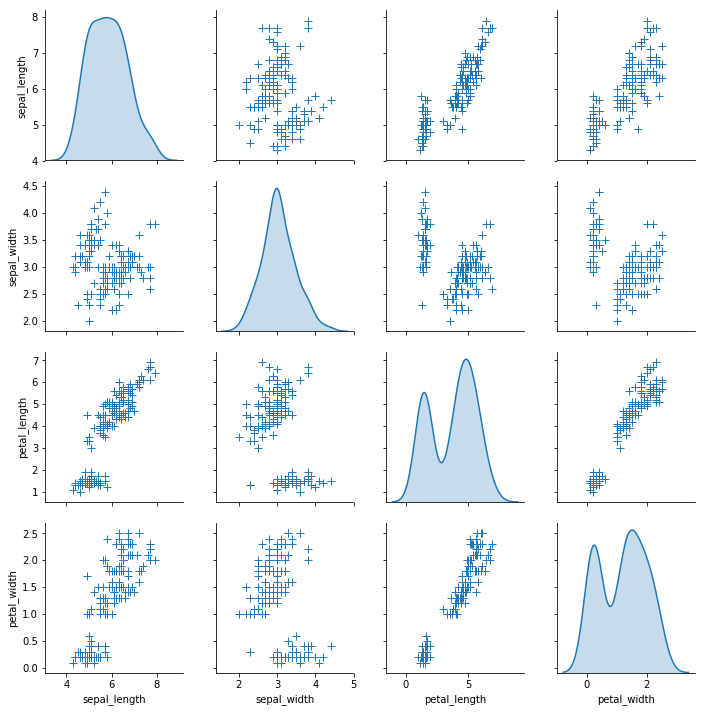

In [15]:
g = sb.pairplot(iris, diag_kind="kde", markers="+",
                          plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                          diag_kws=dict(shade=True))

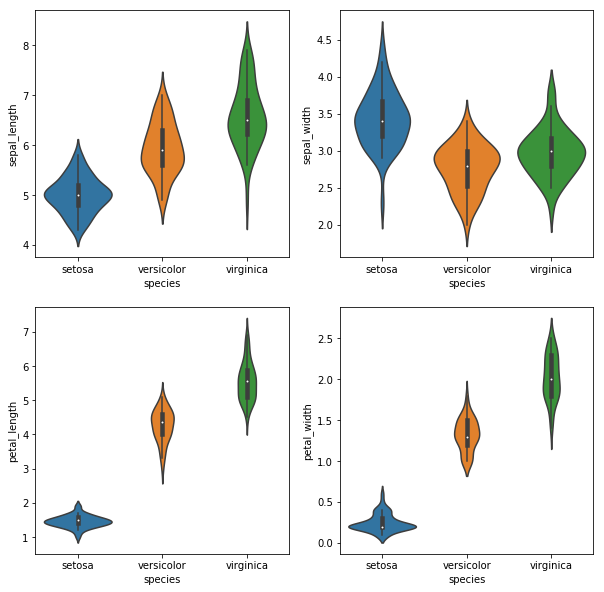

In [18]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sb.violinplot(x='species', y=col, data=iris)

In [88]:
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.88721591, 0.41503226, 0.62463323, 0.40556154, 0.20244074,
        0.30410681, 0.80656863, 0.42703276, 0.2821346 , 0.56304121,
        0.1597379 , 0.67189497],
       [0.19514873, 0.39159149, 0.1647966 , 0.86819829, 0.94900812,
        0.58393083, 0.74827202, 0.57419562, 0.62725414, 0.80301688,
        0.95616793, 0.25177802],
       [0.07595594, 0.27183454, 0.14961544, 0.10415346, 0.99096375,
        0.82094779, 0.85970847, 0.56521821, 0.43201229, 0.15100512,
        0.47743848, 0.36752387],
       [0.64562218, 0.41576989, 0.45408284, 0.16293063, 0.69056232,
        0.72831536, 0.43915284, 0.11321848, 0.33468276, 0.40600485,
        0.2286352 , 0.38440085],
       [0.67466487, 0.08094842, 0.04852558, 0.33605893, 0.73836718,
        0.00825717, 0.23053688, 0.40253208, 0.1981543 , 0.4952166 ,
        0.25494003, 0.23007155],
       [0.46912588, 0.96451392, 0.99928809, 0.58779214, 0.81534892,
        0.07601415, 0.43689033, 0.44446382, 0.62930367, 0.32302486,
        0.56196523,

### heatmap

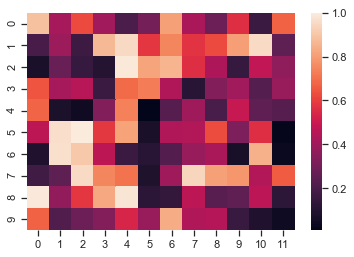

In [90]:
ax = sns.heatmap(uniform_data)

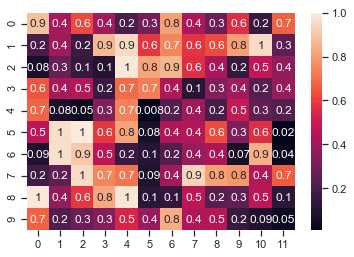

In [94]:
ax = sns.heatmap(uniform_data, annot=True, fmt=".1g")

In [ ]:
cmap : matplotlib colormap name or object, or list of colors, optional
    The mapping from data values to color space. If not provided, the
    default will depend on whether ``center`` is set.

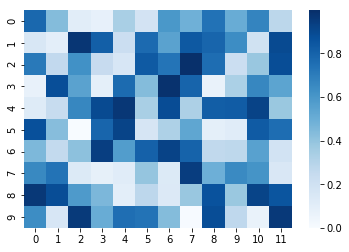

In [22]:
ax = sb.heatmap(uniform_data, cmap='Blues')

## Visualizing linear relationships
http://seaborn.pydata.org/tutorial/regression.html

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

### Functions to draw linear regression models

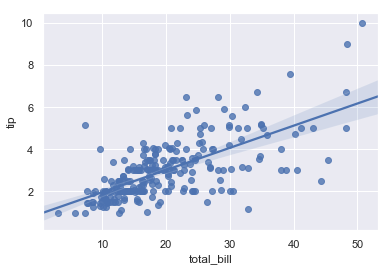

In [83]:
sns.regplot(x="total_bill", y="tip", data=tips);

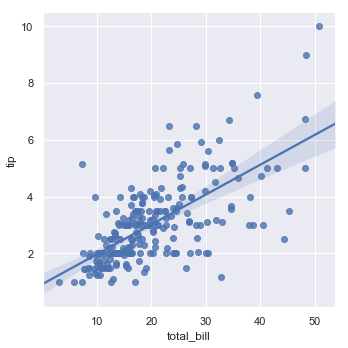

In [84]:
sns.lmplot(x="total_bill", y="tip", data=tips);